Found 33460 images belonging to 5 classes.
Found 3716 images belonging to 5 classes.
Epoch 1/10
1046/1046 [==============================] - 451s 430ms/step - loss: 1.1819 - accuracy: 0.5932 - val_loss: 1.1397 - val_accuracy: 0.5953
Epoch 2/10
1046/1046 [==============================] - 430s 411ms/step - loss: 0.9728 - accuracy: 0.6384 - val_loss: 1.0922 - val_accuracy: 0.6340
Epoch 3/10
1046/1046 [==============================] - 399s 382ms/step - loss: 0.6257 - accuracy: 0.7717 - val_loss: 1.3160 - val_accuracy: 0.6946
Epoch 4/10
1046/1046 [==============================] - 537s 513ms/step - loss: 0.4700 - accuracy: 0.8442 - val_loss: 1.3398 - val_accuracy: 0.5867
Epoch 5/10
1046/1046 [==============================] - 389s 372ms/step - loss: 0.3947 - accuracy: 0.8763 - val_loss: 1.2983 - val_accuracy: 0.6076
INFO:tensorflow:Assets written to: C:/Users/ASUS/Desktop/myenv\assets


INFO:tensorflow:Assets written to: C:/Users/ASUS/Desktop/myenv\assets


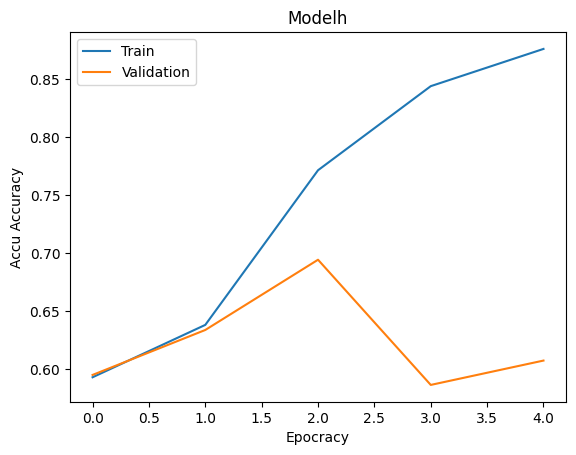

In [1]:

import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers


train_data_dir = r'C:\Users\ASUS\Desktop\ECG\ecg_img\train'


labels = []


categories = ['N', 'S', 'V', 'F', 'Q']


for category in categories:
    category_dir = os.path.join(train_data_dir, category)
    subfolders = os.listdir(category_dir)

    for subfolder in subfolders:
        subfolder_dir = os.path.join(category_dir, subfolder)
        for _ in os.listdir(subfolder_dir):
            labels.append(categories.index(category))


y = np.array(labels)


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  
)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,  
    class_mode='categorical',
    subset='training'  
)


validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,  
    class_mode='categorical',
    subset='validation'  
)


model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    restore_best_weights=True  
)


history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  
    callbacks=[early_stopping] 
)


model.save('C:/Users/ASUS/Desktop/myenv')  

import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelh')
plt.ylabel('Accu Accuracy')
plt.xlabel('Epocracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
